In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel(r"C:\Users\jithi\Desktop\Vinu DSA\iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
data.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [21]:
mean_SL=data['SL'].mean()
mean_SW=data['SW'].mean()
mean_PL=data['PL'].mean()
data['SL'].fillna(value= mean_SL, inplace= True)
data['SW'].fillna(value= mean_SW, inplace= True)
data['PL'].fillna(value= mean_PL, inplace= True)
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [22]:
data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [23]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [24]:
data.shape

(150, 5)

In [25]:
data['Classification']=data['Classification'].map({'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0}) 

In [26]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,2
1,4.900000,3.0,1.4,0.2,2
2,5.855944,3.2,1.3,0.2,2
3,4.600000,3.1,1.5,0.2,2
4,5.000000,3.6,1.4,0.2,2


In [27]:
data.describe()


,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,1.000000
std,0.808480,0.421884,1.725479,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


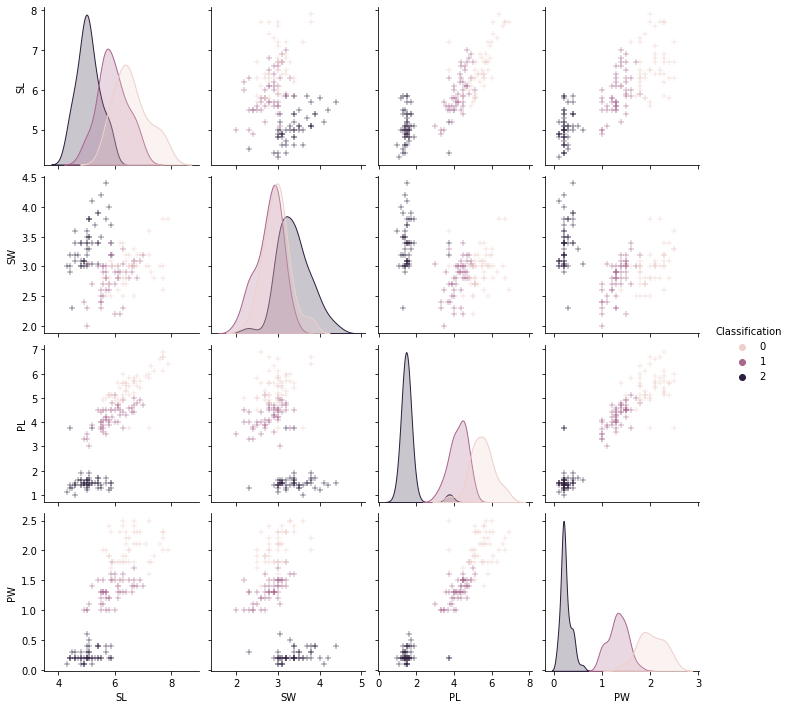

In [29]:
#data = data.drop('Classification', axis=1)

#g = sns.pairplot(data, hue='Classification', markers='+')

sns.pairplot(data,hue='Classification',markers='+')
plt.show()

In [33]:
y= data['Classification']
X= data.drop(['Classification'],axis=1)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [58]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)
(150, 4)

(150, 4)
(150,)


(150, 4)

In [59]:
#kNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier= KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
print("F1_score :",f1_score(prediction,y_test,average='micro')) 
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : 0.9555555555555556
Accuracy score : 0.9555555555555556
Confusion_matrix : [[13  2  0]
 [ 0 15  0]
 [ 0  0 15]]


In [92]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(random_state=42,max_iter=10000)
lr.fit(X_train,y_train)
lr_y_prediction_train = lr.predict(X_train)
lr_y_prediction_test = lr.predict(X_test)
print('Logistic Regression Accuracy score:',accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Logistic Regression Accuracy score: 0.9777777777777777
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.35)

In [61]:
X_train.shape

(97, 4)

In [62]:
data['Classification'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Classification, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#Train test splitting

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3,stratify = y)

In [80]:
print(y_test.value_counts())
print(y_train.value_counts())

2    15
1    15
0    15
Name: Classification, dtype: int64
1    35
0    35
2    35
Name: Classification, dtype: int64


In [81]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average=None))
print("Accuracy score :",accuracy_score(y_test,prediction))

F1_score : [0.93333333 0.93333333 1.        ]
Accuracy score : 0.9555555555555556


In [82]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)
prediction=rf.predict(X_test)
print("F1_score :",f1_score(y_test,prediction,average='micro'))
print("Accuracy score :",accuracy_score(y_test,prediction))


F1_score : 0.9777777777777777
Accuracy score : 0.9777777777777777


In [83]:
#SVM
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [87]:
from sklearn.metrics import classification_report

svm_y_pred = svm_model.predict(X_test)
print("F1_score :",f1_score(y_test,svm_y_pred,average='micro'))

print('SVM Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test,prediction))

F1_score : 0.9777777777777777
SVM Accuracy Score: 0.9777777777777777
Confusion Matrix:
 [[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [85]:
#According to f1 score and accuracy Random Forest, Logistic Regression and svm were also precise with accuracy 0.97